# NAMA : RAYNALDY MOCHAMAD FIRDAUS
# NIM: 221351118
# KELAS: PAGI A

# Business Understanding

## Project Domain

Machine Learning / Data Science - Predictive Analytics in Transportation Safety;
Proyek ini berada dalam domain data science dan machine learning, dengan fokus pada analisis data historis kecelakaan kapal untuk memprediksi kelangsungan hidup penumpang.

## Problem Statements

1. Banyak penumpang Titanic kehilangan nyawa dalam kecelakaan tersebut, namun belum ada pemahaman yang menyeluruh mengenai faktor-faktor yang paling signifikan dalam menentukan kelangsungan hidup.
2. Data historis yang tersedia belum sepenuhnya dimanfaatkan untuk membangun sistem prediksi yang dapat membantu dalam analisis keselamatan transportasi.
3. Tidak ada model prediktif yang efektif yang bisa digunakan untuk mengidentifikasi profil penumpang dengan kemungkinan selamat yang lebih tinggi.

## Goals

1. Mengembangkan model machine learning untuk memprediksi apakah seorang penumpang Titanic akan selamat atau tidak berdasarkan atribut seperti usia, jenis kelamin, kelas tiket, dan lainnya.

2. Mengidentifikasi faktor-faktor utama yang mempengaruhi kelangsungan hidup penumpang.

3. Menyediakan insight yang dapat digunakan untuk meningkatkan protokol keselamatan dalam transportasi publik.

## Solustion Statements

1. Menggunakan dataset Titanic untuk melakukan eksplorasi data, pembersihan data, dan feature engineering.

2. Melatih dan mengevaluasi berbagai algoritma machine learning (seperti Logistic Regression, Decision Tree, Random Forest, Ann.) untuk menemukan model prediksi terbaik.

3. Menyediakan visualisasi dan analisis interpretatif untuk mendukung temuan dan rekomendasi berbasis dat

# Data Understanding

## Import data dari kaggle

In [84]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"raynaldymochammad","key":"7e7bc0c1b6b87a07a4404db0d557dc29"}'}

In [85]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [86]:
!kaggle datasets download -d yasserh/titanic-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
titanic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [87]:
!mkdir titanic
!unzip -qq titanic-dataset.zip -d titanic
!ls titanic

mkdir: cannot create directory ‘titanic’: File exists
replace titanic/Titanic-Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
Titanic-Dataset.csv


# Import Library yang dibutuhkan

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Exploratory Data Analysis

In [89]:
df = pd.read_csv('/content/titanic/Titanic-Dataset.csv')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [91]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


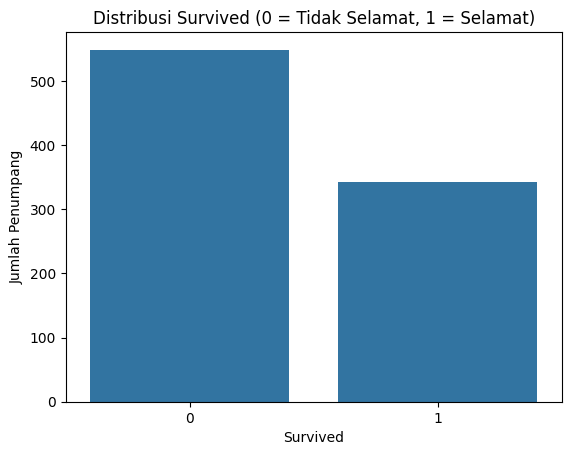

In [92]:
#1.Distribusi Kolom 'Survived
sns.countplot(x='Survived', data=df)
plt.title('Distribusi Survived (0 = Tidak Selamat, 1 = Selamat)')
plt.xlabel('Survived')
plt.ylabel('Jumlah Penumpang')
plt.show()

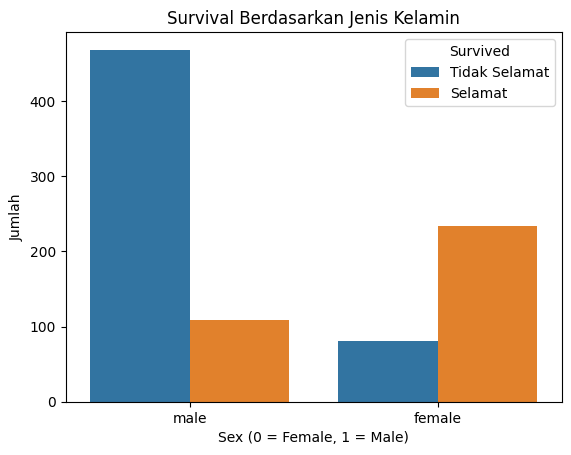

In [93]:
#2.Perbandingan Survived berdasarkan Jenis Kelamin
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Berdasarkan Jenis Kelamin')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Jumlah')
plt.legend(title='Survived', labels=['Tidak Selamat', 'Selamat'])
plt.show()

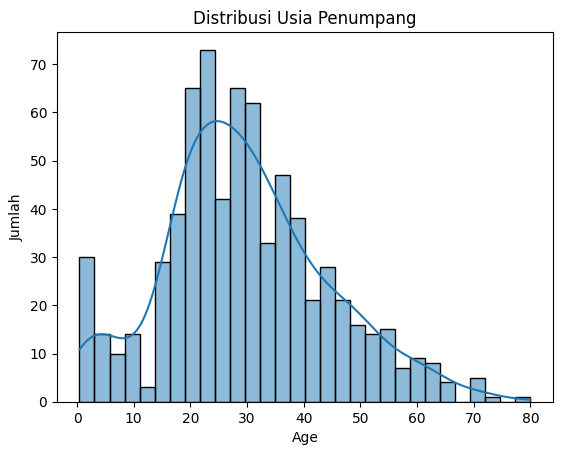

In [94]:
#3.Distribusi Usia Penumpang
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribusi Usia Penumpang')
plt.xlabel('Age')
plt.ylabel('Jumlah')
plt.show()

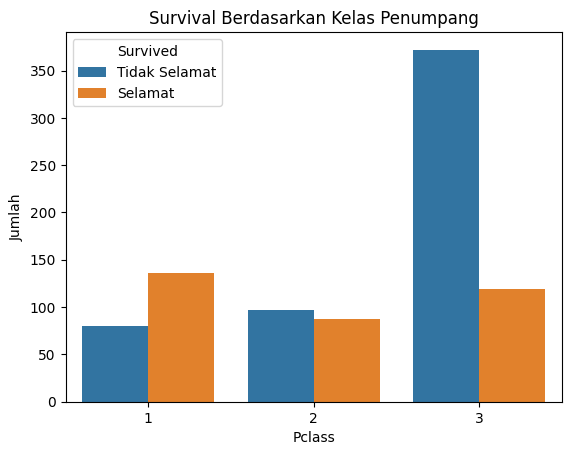

In [95]:
#4.Survival Rate Berdasarkan Kelas Penumpang (Pclass)
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Berdasarkan Kelas Penumpang')
plt.xlabel('Pclass')
plt.ylabel('Jumlah')
plt.legend(title='Survived', labels=['Tidak Selamat', 'Selamat'])
plt.show()

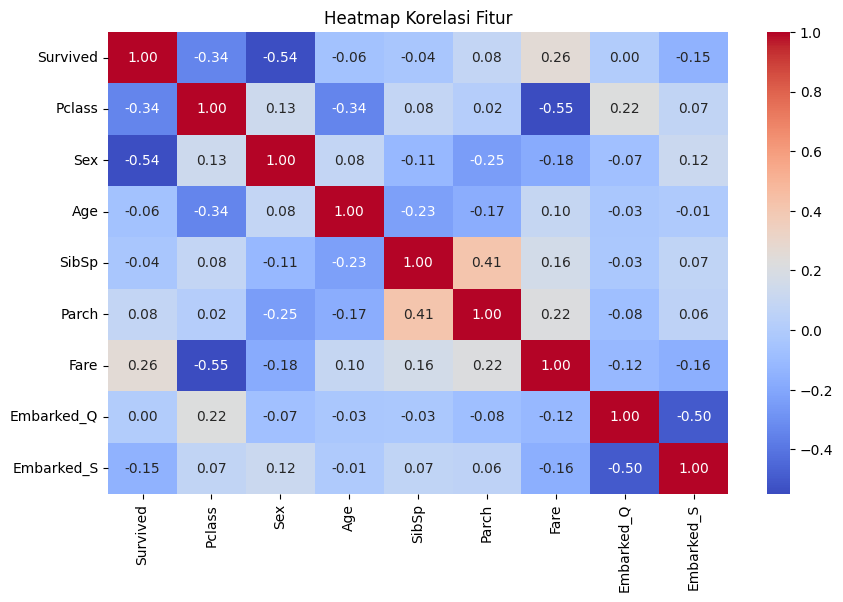

In [125]:
#5.Korelasi Fitur (Heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur')
plt.show()

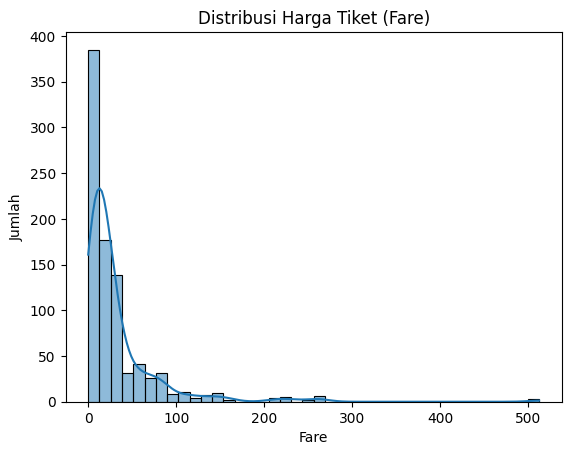

In [97]:
#6. Distribusi Fare (Biaya Tiket)
sns.histplot(df['Fare'], bins=40, kde=True)
plt.title('Distribusi Harga Tiket (Fare)')
plt.xlabel('Fare')
plt.ylabel('Jumlah')
plt.show()

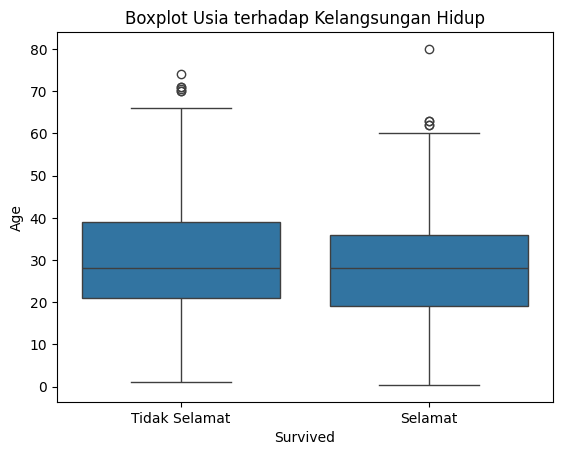

In [98]:
#7. Boxplot Usia Terhadap Kelangsungan hiduo
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Boxplot Usia terhadap Kelangsungan Hidup')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['Tidak Selamat', 'Selamat'])
plt.show()

# Data Preparation

In [99]:
# Drop kolom yang tidak dibutuhkan
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [100]:
# Imputasi nilai hilang
df['Age'] = SimpleImputer(strategy='median').fit_transform(df[['Age']])
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-100-3629625468.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [101]:
# Encode kolom kategorikal
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [102]:
# Pisahkan fitur dan label
X = df.drop('Survived', axis=1)
y = df['Survived']

In [103]:
# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [104]:
# Split data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modeling

In [105]:
# Bangun model ANN
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [106]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

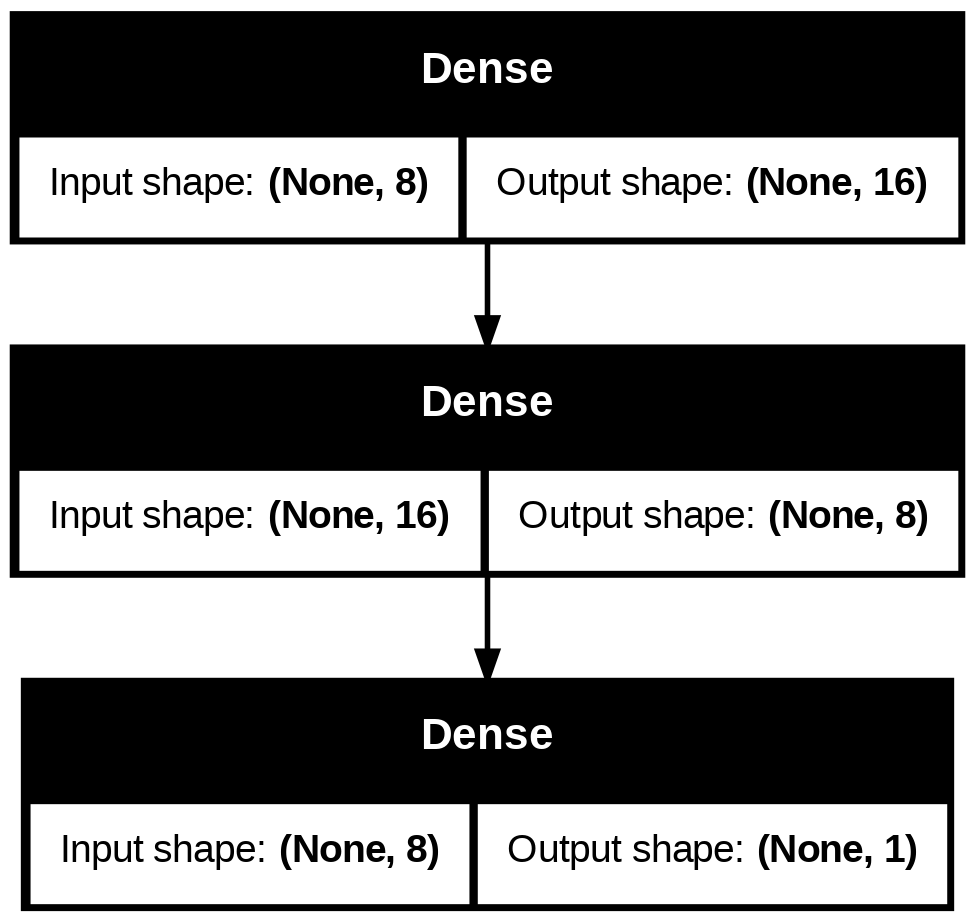

In [107]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [113]:
# Kompilasi
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [114]:
# latih model
history = model.fit(X_train, y_train, epochs=34, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/34
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8677 - loss: 0.3779 - val_accuracy: 0.8252 - val_loss: 0.3925
Epoch 2/34
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8537 - loss: 0.3848 - val_accuracy: 0.8252 - val_loss: 0.3968
Epoch 3/34
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8475 - loss: 0.3692 - val_accuracy: 0.8252 - val_loss: 0.3938
Epoch 4/34
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8654 - loss: 0.3457 - val_accuracy: 0.8252 - val_loss: 0.3946
Epoch 5/34
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8586 - loss: 0.3643 - val_accuracy: 0.8252 - val_loss: 0.3965
Epoch 6/34
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8450 - loss: 0.3783 - val_accuracy: 0.8182 - val_loss: 0.3977
Epoch 7/34
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8392 - loss: 0.4036 - val_accuracy: 0.8252 - val_loss: 0.3953
Epoch 8/34
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8608 - loss: 0.3661 - val_accuracy: 0.8252 - val_loss

# Evaluation

In [115]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Akurasi: {acc:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8311 - loss: 0.4145 
Akurasi: 0.82


In [116]:
# Plot grafik akurasi dan loss
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

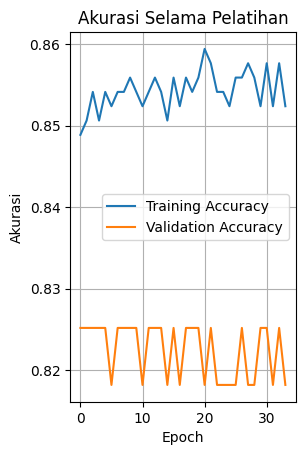

In [117]:
# Grafik akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)

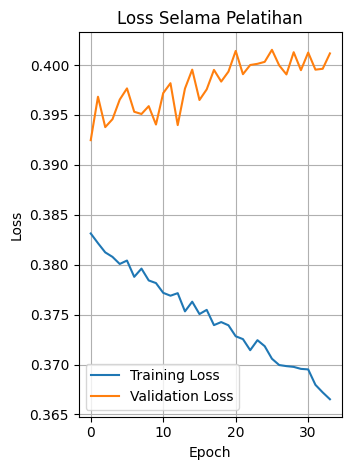

In [118]:
# Grafik loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Model simulation

In [119]:
prediction = model.predict(sample_input_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


# input pertama

In [120]:
# Menentukan kelas (Selamat atau Tidak Selamat) berdasarkan ambang batas 0.5
predicted_class = "Selamat" if prediction[0][0] > 0.5 else "Tidak Selamat"
print(f"Probabilitas Selamat: {prediction[0][0]:.4f}")
print(f"Prediksi: {predicted_class}")

Probabilitas Selamat: 0.1324
Prediksi: Tidak Selamat


# Input kedua

In [121]:
#  input lainnya (sesuaikan dengan fitur yang digunakan: Pclass, Sex, Age, SibSp, Parch, Fare, Embarked_Q, Embarked_S)
# Misalnya, seorang wanita, kelas 1, usia 30, 0 saudara/pasangan, 0 orang tua/anak, fare 50, embark C
sample_input_2 = np.array([[1, 0, 30.0, 0, 0, 50.0, 0, 0]]) # Embarked_Q=0, Embarked_S=0 -> ini C
sample_input_2_scaled = scaler.transform(sample_input_2)
prediction_2 = model.predict(sample_input_2_scaled)
predicted_class_2 = "Selamat" if prediction_2[0][0] > 0.5 else "Tidak Selamat"

print(f"\nUntuk input kedua:")
print(f"Probabilitas Selamat: {prediction_2[0][0]:.4f}")
print(f"Prediksi: {predicted_class_2}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Untuk input kedua:
Probabilitas Selamat: 0.9904
Prediksi: Selamat


# Input ketiga

In [122]:
#  input lainnya (seorang pria, kelas 3, usia 60, 0 saudara/pasangan, 0 orang tua/anak, fare 10, embark S)
sample_input_3 = np.array([[3, 1, 60.0, 0, 0, 10.0, 0, 1]]) # Embarked_Q=0, Embarked_S=1 -> ini S
sample_input_3_scaled = scaler.transform(sample_input_3)
prediction_3 = model.predict(sample_input_3_scaled)
predicted_class_3 = "Selamat" if prediction_3[0][0] > 0.5 else "Tidak Selamat"

print(f"\nUntuk input ketiga:")
print(f"Probabilitas Selamat: {prediction_3[0][0]:.4f}")
print(f"Prediksi: {predicted_class_3}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

Untuk input ketiga:
Probabilitas Selamat: 0.0642
Prediksi: Tidak Selamat


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Save Model

In [124]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('titanic_survival_prediction.tflite', 'wb') as f:
    f.write(tflite_model)


files.download('titanic_survival_prediction.tflite')

Saved artifact at '/tmp/tmpgrseq4um'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='keras_tensor_8')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140461571182992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140461571182608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140461571185680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140461571181840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140461571183568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140461571183376: TensorSpec(shape=(), dtype=tf.resource, name=None)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>